In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime


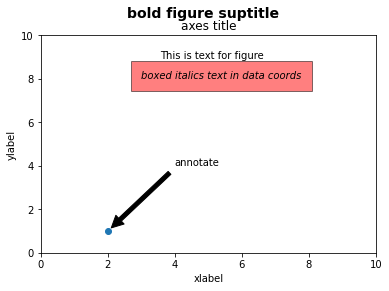

In [3]:

fig = plt.figure()
ax = fig.add_subplot()


# 分别为figure和ax设置标题，注意两者的位置是不同的
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

# 设置x和y轴标签
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x和y轴显示范围均为0到10
ax.axis([0, 10, 0, 10])

# 在子图上添加文本
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# 在画布上添加文本，一般在子图上添加文本是更常见的操作，这种方法很少用
fig.text(0.4,0.8,'This is text for figure')

ax.plot([2], [1], 'o')
# 添加注解
ax.annotate('annotate', xy=(2, 1), xytext=(4, 4),arrowprops=dict(facecolor='black', shrink=0.05));


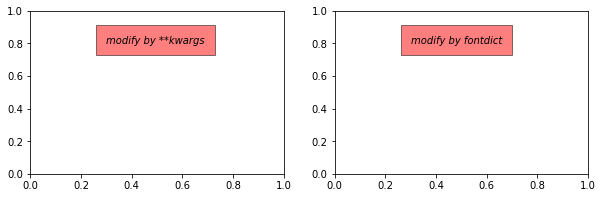

In [4]:
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)

# 使用关键字参数修改文本样式
axes[0].text(0.3, 0.8, 'modify by **kwargs', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10});

# 使用fontdict参数修改文本样式
font = {'bbox':{'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, 'style':'italic'}
axes[1].text(0.3, 0.8, 'modify by fontdict', fontdict=font);


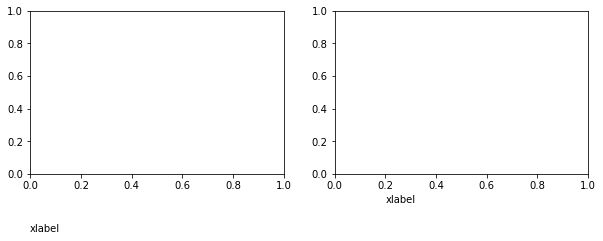

In [11]:
# 观察labelpad和loc参数的使用效果
fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,2)
axes[0].set_xlabel('xlabel',labelpad=33,loc='left')

# loc参数仅能提供粗略的位置调整，如果想要更精确的设置标签的位置，可以使用position参数+horizontalalignment参数来定位
# position由一个元组过程，第一个元素0.2表示x轴标签在x轴的位置，第二个元素对于xlabel其实是无意义的，随便填一个数都可以
# horizontalalignment='left'表示左对齐，这样设置后x轴标签就能精确定位在x=0.2的位置处
axes[1].set_xlabel('xlabel', position=(0.2, _), horizontalalignment='left');


Text(0.5, 1.0, 'This is title')

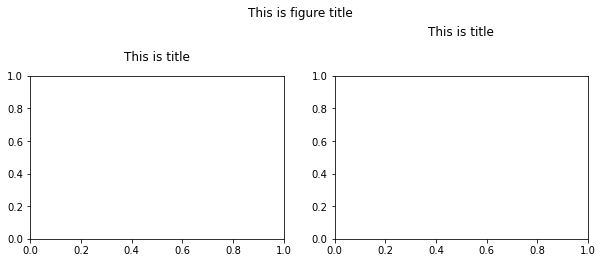

In [13]:
# 观察pad参数的使用效果
fig = plt.figure(figsize=(10,3))
fig.suptitle('This is figure title',y=1.2) # 通过参数y设置高度
axes = fig.subplots(1,2)
axes[0].set_title('This is title',pad=15)
axes[1].set_title('This is title',pad=40)


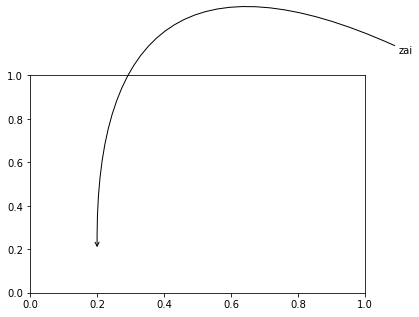

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate("zai",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(1.1, 1.1), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8")
            );


In [28]:
x1 = np.linspace(0.0, 10.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)


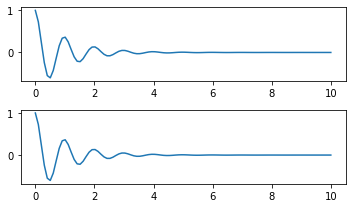

In [29]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
# axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.)) # 不建议


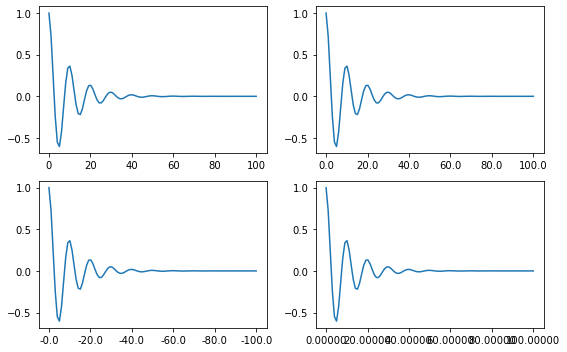

In [30]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter);


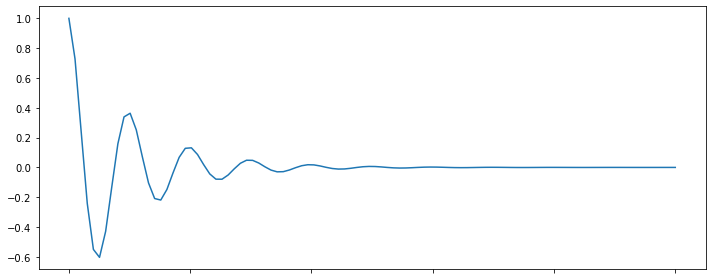

In [33]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks);


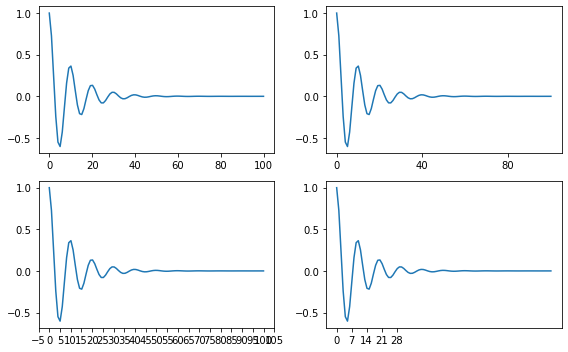

In [34]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=3)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator);


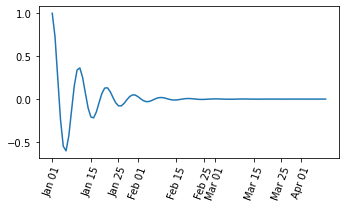

In [35]:
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);


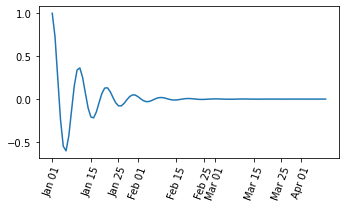

In [36]:
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);


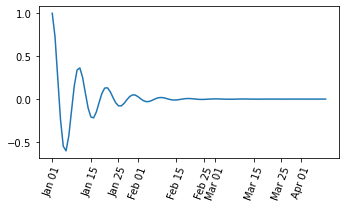

In [37]:
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70);


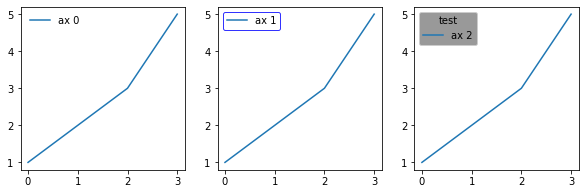

In [42]:
from matplotlib.pyplot import title


fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,3)
for i, ax in enumerate(axes):
    ax.plot([1,2,3,5],label=f'ax {i}')
axes[0].legend(frameon=False) #去掉图例边框
axes[1].legend(edgecolor='blue') #设置图例边框颜色
axes[2].legend(facecolor='gray',title='test'); #设置图例背景颜色,若无边框,参数无效


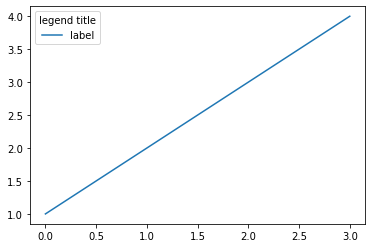

In [41]:
fig,ax =plt.subplots()
ax.plot([1,2,3,4],label='label')
ax.legend(title='legend title');


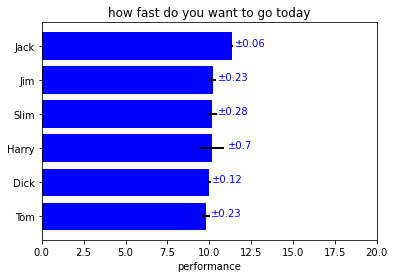

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
x=["Tom","Dick","Harry","Slim","Jim","Jack"]
y=np.random.randn(len(x))+10

error= np.random.rand(len(x)).round(2)

fig,ax=plt.subplots()
ax.set_title("how fast do you want to go today")

ax.set_xlim(0,20)
for i in range(0,len(x)):
	ax.text(y[i] + error[i] + 1, x[i], '±' + str(error[i]), fontsize=10,horizontalalignment='center', color='blue')
	# ax.set_xlim(0,30,2)
	ax.set_xlabel('performance')
	plt.barh(x,y,xerr = error,color="blue")
